In [1]:
import pandas as pd
import numpy as np

# For visualizations
import matplotlib.pyplot as plt

import scipy
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#from pandas_profiling import ProfileReport

import re
# For handling string
import string
# For performing mathematical operations
import math
import kagglehub

# Download latest version
path = kagglehub.dataset_download("datafiniti/consumer-reviews-of-amazon-products")


In [2]:
# Importing dataset
df=pd.read_csv('Datafiniti_Amazon.csv') 
print("Shape of data=>",df.shape)

#Reference:https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/

Shape of data=> (5000, 24)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   5000 non-null   object 
 1   dateAdded            5000 non-null   object 
 2   dateUpdated          5000 non-null   object 
 3   name                 5000 non-null   object 
 4   asins                5000 non-null   object 
 5   brand                5000 non-null   object 
 6   categories           5000 non-null   object 
 7   primaryCategories    5000 non-null   object 
 8   imageURLs            5000 non-null   object 
 9   keys                 5000 non-null   object 
 10  manufacturer         5000 non-null   object 
 11  manufacturerNumber   5000 non-null   object 
 12  reviews.date         5000 non-null   object 
 13  reviews.dateAdded    1052 non-null   object 
 14  reviews.dateSeen     5000 non-null   object 
 15  reviews.doRecommend  5000 non-null   b

In [5]:
list(df)
df.shape
df.info()
df.describe().transpose()
df.head(n=20)
df.tail()
pd.isna(df)
df.corr(numeric_only = True)

['id',
 'dateAdded',
 'dateUpdated',
 'name',
 'asins',
 'brand',
 'categories',
 'primaryCategories',
 'imageURLs',
 'keys',
 'manufacturer',
 'manufacturerNumber',
 'reviews.date',
 'reviews.dateAdded',
 'reviews.dateSeen',
 'reviews.doRecommend',
 'reviews.id',
 'reviews.numHelpful',
 'reviews.rating',
 'reviews.sourceURLs',
 'reviews.text',
 'reviews.title',
 'reviews.username',
 'sourceURLs']

(5000, 24)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   5000 non-null   object 
 1   dateAdded            5000 non-null   object 
 2   dateUpdated          5000 non-null   object 
 3   name                 5000 non-null   object 
 4   asins                5000 non-null   object 
 5   brand                5000 non-null   object 
 6   categories           5000 non-null   object 
 7   primaryCategories    5000 non-null   object 
 8   imageURLs            5000 non-null   object 
 9   keys                 5000 non-null   object 
 10  manufacturer         5000 non-null   object 
 11  manufacturerNumber   5000 non-null   object 
 12  reviews.date         5000 non-null   object 
 13  reviews.dateAdded    1052 non-null   object 
 14  reviews.dateSeen     5000 non-null   object 
 15  reviews.doRecommend  5000 non-null   b

,count,mean,std,min,25%,50%,75%,max
reviews.id,29.0,1.858740e+08,2.084040e+07,108211188.0,185118492.0,188075721.0,198194852.0,202781248.0
reviews.numHelpful,5000.0,3.124000e-01,3.111582e+00,0.0,0.0,0.0,0.0,105.0
reviews.rating,5000.0,4.596800e+00,7.318038e-01,1.0,4.0,5.0,5.0,5.0


,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,4,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...
3,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-10-09T00:00:00Z,True,177283626.0,3,5,https://redsky.target.com/groot-domain-api/v1/...,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,https://www.newegg.com/Product/Product.aspx%25...
4,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,https://www.newegg.com/Product/Product.aspx%25...
5,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",False,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This make an excellent ebook reader. Don't exp...,Good ebook,rmwarriors,https://www.newegg.com/Product/Product.aspx%25...
6,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-10-09T00:00:00Z,True,187043823.0,0,5,https://redsky.target.com/groot-domain-api/v1/...,"I ordered this for my daughter, as I have the ...",Light Weight - Makes a world of difference whe...,LexieCrews,https://www.newe

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
4995,AVqkIdZiv8e3D1O-leaJ,2017-03-06T14:59:25Z,2017-09-04T11:19:31Z,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",B018Y224PY,Amazon,"Tablets,Fire Tablets,Electronics,iPad & Tablet...",Electronics,https://images-na.ssl-images-amazon.com/images...,"841667103150,0841667103150,firetabletwithalexa...",...,"2017-04-30T02:06:48.451Z,2017-06-07T08:20:48.408Z",True,NaN,0,5,http://reviews.bestbuy.com/3545/5025900/review...,This is a great tablet for the price. Amazon i...,Good product,litle,"https://www.barcodable.com/upc/841667103150,ht..."
4996,AVqkIdZiv8e3D1O-leaJ,2017-03-06T14:59:25Z,2017-09-04T11:19:31Z,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",B018Y224PY,Amazon,"Tablets,Fire Tablets,Electronics,iPad & Tablet...",Electronics,https://images-na.ssl-images-amazon.com/images...,"841667103150,0841667103150,firetabletwithalexa...",...,"2017-04-30T02:07:00.236Z,2017-06-07T08:20:55.199Z",True,NaN,1,5,http://reviews.bestbuy.com/3545/5025900/review...,This tablet is the perfect size and so easy to...,Great Tablet,gracie,"https://www.barcodable.com/upc/841667103150,ht..."
4997,AVqkIdZiv8e3D1O-leaJ,2017-03-06T14:59:25Z,2017-09-04T11:19:31Z,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",B018Y224PY,Amazon,"Tablets,Fire Tablets,Electronics,iPad & Tablet...",Electronics,https://images-na.ssl-images-amazon.com/images...,"841667103150,0841667103150,firetabletwithalexa...",...,"2017-04-30T02:03:13.567Z,2017-06-07T08:10:47.953Z",True,NaN,8,4,http://reviews.bestbuy.com/3545/5025900/review...,Purchased this for my son. Has room to upgrade...,Great for kids or smaller needs,Hawk,"https://www.barcodable.com/upc/841667103150,ht..."
4998,AVqkIdZiv8e3D1O-leaJ,2017-03-06T14:59:25Z,2017-09-04T11:19:31Z,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",B018Y224PY,Amazon,"Tablets,Fire Tablets,Electronics,iPad & Tablet...",Electronics,https://images-na.ssl-images-amazon.com/images...,"841667103150,0841667103150,firetabletwithalexa...",...,"2017-04-30T02:06:56.574Z,2017-06-07T08:20:53.942Z",True,NaN,0,5,http://reviews.bestbuy.com/3545/5025900/review...,I had some thoughts about getting this for a 5...,Very sturdy for a 5 year old,Mrbilly,"https://www.barcodable.com/upc/841667103150,ht..."
4999,AVqkIdZiv8e3D1O-leaJ,2017-03-06T14:59:25Z,2017-09-04T11:19:31Z,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",B018Y224PY,Amazon,"Tablets,Fire Tablets,Electronics,iPad & Tablet...",Electronics,https://images-na.ssl-images-amazon.com/images...,"841667103150,0841667103150,firetabletwithalexa...",...,"2017-04-03T03:55:09.054Z,2017-04-30T02:03:18.1...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5025900/review...,"this is a steal, have 8 gb model as well.This ...",great little tablet,tabman,"https://www.barcodable.com/upc/841667103150,ht..."


,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating
reviews.doRecommend,1.000000,0.602186,-0.041486,0.639597
reviews.id,0.602186,1.000000,-0.743371,0.800086
reviews.numHelpful,-0.041486,-0.743371,1.000000,-0.067399
reviews.rating,0.639597,0.800086,-0.067399,1.000000


In [6]:
#Selecting columns
df=df[['name','reviews.text','reviews.doRecommend','reviews.numHelpful']]


In [7]:
#Check for null values 
df.dropna(inplace=True)
df.isnull().sum()


C:\Users\Tanish Rajput\AppData\Local\Temp\ipykernel_4440\1917739777.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


name                   0
reviews.text           0
reviews.doRecommend    0
reviews.numHelpful     0
dtype: int64

In [8]:
#Word Count of each review
df['word_count'] = df['reviews.text'].apply(lambda x: len(str(x).split(" ")))
df[['reviews.text','word_count']].head()

C:\Users\Tanish Rajput\AppData\Local\Temp\ipykernel_4440\526071921.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_count'] = df['reviews.text'].apply(lambda x: len(str(x).split(" ")))


,reviews.text,word_count
0,I thought it would be as big as small paper bu...,41
1,This kindle is light and easy to use especiall...,12
2,Didnt know how much i'd use a kindle so went f...,24
3,I am 100 happy with my purchase. I caught it o...,148
4,Solid entry level Kindle. Great for kids. Gift...,36


In [9]:
#Average word count of each review

sum(df['word_count'])/len(df['reviews.text'])

30.9542

C:\Users\Tanish Rajput\AppData\Local\Temp\ipykernel_4440\31642234.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['char_count'] = df['reviews.text'].str.len() ## this also includes spaces


,reviews.text,char_count
0,I thought it would be as big as small paper bu...,211
1,This kindle is light and easy to use especiall...,63
2,Didnt know how much i'd use a kindle so went f...,107
3,I am 100 happy with my purchase. I caught it o...,757
4,Solid entry level Kindle. Great for kids. Gift...,176


(array([4.962e+03, 2.900e+01, 3.000e+00, 1.000e+00, 3.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([  45. ,  875.6, 1706.2, 2536.8, 3367.4, 4198. , 5028.6, 5859.2,
        6689.8, 7520.4, 8351. ]),
 <BarContainer object of 10 artists>)

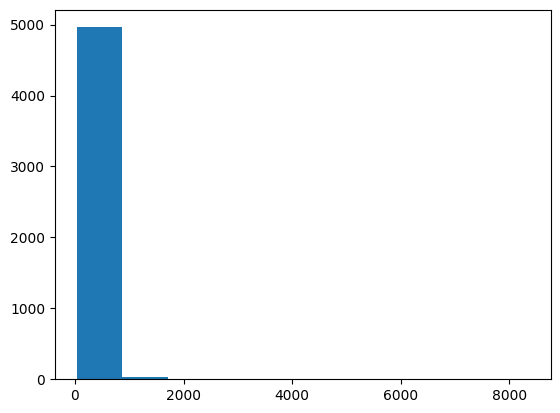

In [10]:
#Character Count of each review
df['char_count'] = df['reviews.text'].str.len() ## this also includes spaces
df[['reviews.text','char_count']].head()
plt.hist(df['char_count'])
plt.show()

In [11]:
#Average Length of words in Review 0 
sum(len(df['reviews.text'][0]) for word in df['reviews.text'][0])/len(df['reviews.text'][0])

211.0

In [12]:
#Average word size of each review

def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

df['avg_word'] = df['reviews.text'].apply(lambda x: avg_word(x))
df[['reviews.text','avg_word']].head()

C:\Users\Tanish Rajput\AppData\Local\Temp\ipykernel_4440\2881858785.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['avg_word'] = df['reviews.text'].apply(lambda x: avg_word(x))


,reviews.text,avg_word
0,I thought it would be as big as small paper bu...,4.170732
1,This kindle is light and easy to use especiall...,4.333333
2,Didnt know how much i'd use a kindle so went f...,3.500000
3,I am 100 happy with my purchase. I caught it o...,4.121622
4,Solid entry level Kindle. Great for kids. Gift...,3.916667


In [13]:
df['name'].unique()
print('Number of products=>',len(df['name'].unique()))

array(['Amazon Kindle E-Reader 6" Wifi (8th Generation, 2016)',
       'Amazon Echo Show Alexa-enabled Bluetooth Speaker with 7" Screen',
       'Amazon Fire TV with 4K Ultra HD and Alexa Voice Remote (Pendant Design) | Streaming Media Player',
       'Amazon - Echo Plus w/ Built-In Hub - Silver',
       'Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders',
       'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case',
       'Kindle E-reader - White, 6 Glare-Free Touchscreen Display, Wi-Fi - Includes Special Offers',
       'Fire Tablet, 7 Display, Wi-Fi, 16 GB - Includes Special Offers, Black',
       'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case',
       'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Blue',
       'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Blue',
       'Amazon Tap - Alexa-Enabled Portable Bluetooth Spe

Number of products=> 23


In [14]:
# Keep products which have a count more than 500 
df=df.groupby('name').filter(lambda x:len(x)>500).reset_index(drop=True)
print('Number of products=>',len(df['name'].unique()))

Number of products=> 4


In [15]:
#Convert columns to int so they can be used to build a model later 
df['reviews.doRecommend']=df['reviews.doRecommend'].astype(int)
df['reviews.numHelpful']=df['reviews.numHelpful'].astype(int)

In [16]:
#Cleaning Data


In [17]:
df['name'].unique()


array(['Amazon Echo Show Alexa-enabled Bluetooth Speaker with 7" Screen',
       'Amazon - Echo Plus w/ Built-In Hub - Silver',
       'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case',
       'All-New Fire HD 8 Tablet, 8" HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta'],
      dtype=object)

In [18]:
# Remove ,,, from entries in name column
df['name'] = df['name'].str.replace(r'\,,,','')

df['name'].unique()

array(['Amazon Echo Show Alexa-enabled Bluetooth Speaker with 7" Screen',
       'Amazon - Echo Plus w/ Built-In Hub - Silver',
       'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case',
       'All-New Fire HD 8 Tablet, 8" HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta'],
      dtype=object)

In [19]:
#Check reviews. text column
print(df['reviews.text'][0])

Great Gift for anyone. Very easy to setup. Coexist with all IOT Devices. Alexa is AWESOME!


In [21]:
#Check first 30 reviews 
i=0
while i<50:
    print ("Review Number ",i)
    print()
    print(df['reviews.text'][i])
    print()
    i=i+1
    


Review Number  0

Great Gift for anyone. Very easy to setup. Coexist with all IOT Devices. Alexa is AWESOME!

Review Number  1

Super excited to give this as a gift. It's super convenient that Best Buy has Echo products in store instead of having to purchase from Amazon.

Review Number  2

We bought this for mother in law, buying another for me.

Review Number  3

Well designed, good sound, has everything Alexa has plus the HD video. Always ready with answers with associated video or text if applicable. Can show movie trailers, can also watch Amazon video. Excellent on-demand security video with Amazon compatible cameras. Voice activated message and/or video calls to Amazon Show owners or Alexa App holders. Highly recommended.

Review Number  4

I have one Alexa and three Echo dots and having Echo Show now is awesome!

Review Number  5

Omg I love my amazon show it is sooo cool and does a lot of cool stuff

Review Number  6

Great looking design. Amazon Echo Show was easy to set up and

In [22]:
#Remove contractions from text reviews
# Dictionary of English Contractions
contractions_dict = { "It's":"It is","it's":"it is", "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
df['reviews.text']=df['reviews.text'].apply(lambda x:expand_contractions(x))

In [23]:
#Check first 30 reviews 
i=0
while i<50:
    print ("Review Number ",i)
    print()
    print(df['reviews.text'][i])
    print()
    i=i+1
    

Review Number  0

Great Gift for anyone. Very easy to setup. Coexist with all IOT Devices. Alexa is AWESOME!

Review Number  1

Super excited to give this as a gift. It is super convenient that Best Buy has Echo products in store instead of having to purchase from Amazon.

Review Number  2

We bought this for mother in law, buying another for me.

Review Number  3

Well designed, good sound, has everything Alexa has plus the HD video. Always ready with answers with associated video or text if applicable. Can show movie trailers, can also watch Amazon video. Excellent on-demand security video with Amazon compatible cameras. Voice activated message and/or video calls to Amazon Show owners or Alexa App holders. Highly recommended.

Review Number  4

I have one Alexa and three Echo dots and having Echo Show now is awesome!

Review Number  5

Omg I love my amazon show it is sooo cool and does a lot of cool stuff

Review Number  6

Great looking design. Amazon Echo Show was easy to set up an

In [24]:
print(df['reviews.text'][0])

Great Gift for anyone. Very easy to setup. Coexist with all IOT Devices. Alexa is AWESOME!


In [25]:
df['reviews.text']=df['reviews.text'].str.lower()


In [26]:
df

,name,reviews.text,reviews.doRecommend,reviews.numHelpful,word_count,char_count,avg_word
0,Amazon Echo Show Alexa-enabled Bluetooth Speak...,great gift for anyone. very easy to setup. coe...,1,0,16,90,4.687500
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,super excited to give this as a gift. it is su...,1,0,26,143,4.538462
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,"we bought this for mother in law, buying anoth...",1,0,11,56,4.181818
3,Amazon Echo Show Alexa-enabled Bluetooth Speak...,"well designed, good sound, has everything alex...",1,0,56,369,5.607143
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,i have one alexa and three echo dots and havin...,1,0,15,73,3.933333
...,...,...,...,...,...,...,...
2788,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",it may be cheap but this is a great tablet and...,1,0,13,61,3.769231
2789,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",better than nook also cheaper. if toy areally ...,1,0,24,132,4.541667
2790,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",very pleased with my amazon tablet. starting w...,1,0,15,83,4.600000
2791,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",this was a request from our 7 yr old granddaug...,1,0,70,400,4.728571


In [27]:
#Alternative to lowercase letters
df['cleaned']=df['reviews.text'].apply(lambda x: x.lower())

In [28]:
#Remove digits and words containing digits 
df['reviews.text']=df['reviews.text'].apply(lambda x: re.sub('\w*\d\w*','', x))


<>:2: SyntaxWarning: invalid escape sequence '\w'
<>:2: SyntaxWarning: invalid escape sequence '\w'
C:\Users\Tanish Rajput\AppData\Local\Temp\ipykernel_4440\1924995701.py:2: SyntaxWarning: invalid escape sequence '\w'
  df['reviews.text']=df['reviews.text'].apply(lambda x: re.sub('\w*\d\w*','', x))


In [29]:
#Remove Punctuations
df['reviews.text']=df['reviews.text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))


0        this product so far has not disappointed my ch...
1        great for beginner or experienced person bough...
2        inexpensive tablet for him to use and learn on...
3        i have had my fire hd  two weeks now and i lov...
4        i bought this for my grand daughter when she c...
                               ...                        
26063    it has many uses you can listen to music check...
26064    cost is not outrageous easy setup fun to use a...
26065    i knew about this from its crowd funding start...
26066    this is a neat product but did not fit my need...
26067    responses well and there are lots of skills to...
Name: reviews.text, Length: 26068, dtype: object

In [30]:
#Check first 30 reviews after cleaning 
i=0
while i<50:
    print ("Review Number ",i)
    print()
    print(df['reviews.text'][i])
    print()
    i=i+1

Review Number  0

great gift for anyone very easy to setup coexist with all iot devices alexa is awesome

Review Number  1

super excited to give this as a gift it is super convenient that best buy has echo products in store instead of having to purchase from amazon

Review Number  2

we bought this for mother in law buying another for me

Review Number  3

well designed good sound has everything alexa has plus the hd video always ready with answers with associated video or text if applicable can show movie trailers can also watch amazon video excellent ondemand security video with amazon compatible cameras voice activated message andor video calls to amazon show owners or alexa app holders highly recommended

Review Number  4

i have one alexa and three echo dots and having echo show now is awesome

Review Number  5

omg i love my amazon show it is sooo cool and does a lot of cool stuff

Review Number  6

great looking design amazon echo show was easy to set up and use

Review Number 

In [31]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [32]:
Z=df['reviews.text']
print(Z)

0       great gift for anyone very easy to setup coexi...
1       super excited to give this as a gift it is sup...
2       we bought this for mother in law buying anothe...
3       well designed good sound has everything alexa ...
4       i have one alexa and three echo dots and havin...
                              ...                        
2788    it may be cheap but this is a great tablet and...
2789    better than nook also cheaper if toy areally l...
2790    very pleased with my amazon tablet starting wi...
2791    this was a request from our  yr old granddaugt...
2792    perfect for basic stuff games and media readin...
Name: reviews.text, Length: 2793, dtype: object


,reviews.text,stopwords
0,great gift for anyone very easy to setup coexi...,6
1,super excited to give this as a gift it is sup...,13
2,we bought this for mother in law buying anothe...,6
3,well designed good sound has everything alexa ...,12
4,i have one alexa and three echo dots and havin...,7


(array([2.45e+03, 2.82e+02, 4.00e+01, 7.00e+00, 6.00e+00, 5.00e+00,
        1.00e+00, 0.00e+00, 1.00e+00, 1.00e+00]),
 array([  0. ,  27.4,  54.8,  82.2, 109.6, 137. , 164.4, 191.8, 219.2,
        246.6, 274. ]),
 <BarContainer object of 10 artists>)

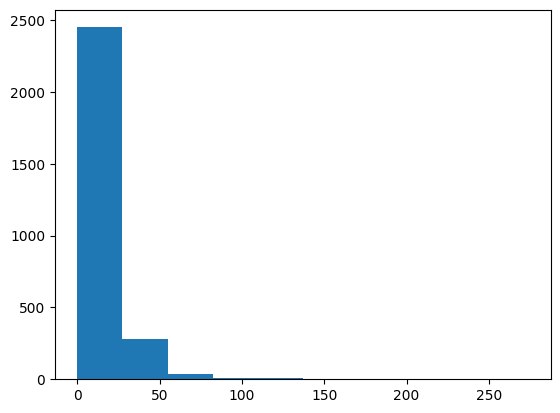

In [33]:
#check count of StopWords
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['stopwords'] = df['reviews.text'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['reviews.text','stopwords']].head()

plt.hist(df['stopwords'])

plt.show()

In [34]:
#Commonly occuring words
freq = pd.Series(' '.join(df['reviews.text']).split()).value_counts()[:10]
freq

the     3585
and     2763
to      2751
it      2677
i       2412
for     1944
is      1918
a       1797
my      1509
this    1340
Name: count, dtype: int64

In [35]:
#removal of commonly occuring irrelevant words
freq = list(freq)
df['reviews.text'] = df['reviews.text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['reviews.text'].head()

0    great gift for anyone very easy to setup coexi...
1    super excited to give this as a gift it is sup...
2    we bought this for mother in law buying anothe...
3    well designed good sound has everything alexa ...
4    i have one alexa and three echo dots and havin...
Name: reviews.text, dtype: object

In [36]:
#Count of rare words

freq_rare = pd.Series(' '.join(df['reviews.text']).split()).value_counts()[-100:]
freq_rare

courses      1
downfalls    1
prosprice    1
biology      1
booka        1
            ..
crash        1
clamps       1
please       1
layout       1
tweaking     1
Name: count, Length: 100, dtype: int64

In [37]:
#removal of rarely occuring irrelevant words
freq_rare = list(freq_rare)
df['reviews.text'] = df['reviews.text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['reviews.text'].head()

0    great gift for anyone very easy to setup coexi...
1    super excited to give this as a gift it is sup...
2    we bought this for mother in law buying anothe...
3    well designed good sound has everything alexa ...
4    i have one alexa and three echo dots and havin...
Name: reviews.text, dtype: object

In [39]:
#Spell Correction(Time consuming), Try on first 5 reviews
from textblob import TextBlob
df['reviews.text_Corrected Spelling']=df['reviews.text'][1:5].apply(lambda x: str(TextBlob(x).correct()))
df.head(5)

,name,reviews.text,reviews.doRecommend,reviews.numHelpful,word_count,char_count,avg_word,cleaned,stopwords,reviews.text_Corrected Spelling
0,Amazon Echo Show Alexa-enabled Bluetooth Speak...,great gift for anyone very easy to setup coexi...,1,0,16,90,4.687500,great gift for anyone. very easy to setup. coe...,6,NaN
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,super excited to give this as a gift it is sup...,1,0,26,143,4.538462,super excited to give this as a gift. it is su...,13,super excited to give this as a gift it is sup...
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,we bought this for mother in law buying anothe...,1,0,11,56,4.181818,"we bought this for mother in law, buying anoth...",6,we bought this for mother in law buying anothe...
3,Amazon Echo Show Alexa-enabled Bluetooth Speak...,well designed good sound has everything alexa ...,1,0,56,369,5.607143,"well designed, good sound, has everything alex...",12,well designed good sound has everything area h...
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,i have one alexa and three echo dots and havin...,1,0,15,73,3.933333,i have one alexa and three echo dots and havin...,7,i have one area and three echo dots and having...


In [40]:
# Import stopwords with nltk.
from nltk.corpus import stopwords
stop = stopwords.words('english')

# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
df['reviews.text.nostopwords'] = df['reviews.text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
print(df)


                                                   name  \
0     Amazon Echo Show Alexa-enabled Bluetooth Speak...   
1     Amazon Echo Show Alexa-enabled Bluetooth Speak...   
2     Amazon Echo Show Alexa-enabled Bluetooth Speak...   
3     Amazon Echo Show Alexa-enabled Bluetooth Speak...   
4     Amazon Echo Show Alexa-enabled Bluetooth Speak...   
...                                                 ...   
2788  All-New Fire HD 8 Tablet, 8" HD Display, Wi-Fi...   
2789  All-New Fire HD 8 Tablet, 8" HD Display, Wi-Fi...   
2790  All-New Fire HD 8 Tablet, 8" HD Display, Wi-Fi...   
2791  All-New Fire HD 8 Tablet, 8" HD Display, Wi-Fi...   
2792  All-New Fire HD 8 Tablet, 8" HD Display, Wi-Fi...   

                                           reviews.text  reviews.doRecommend  \
0     great gift for anyone very easy to setup coexi...                    1   
1     super excited to give this as a gift it is sup...                    1   
2     we bought this for mother in law buying anoth

In [41]:
import nltk

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

df['reviews.text.nostopwords.lemmatized2'] = df['reviews.text.nostopwords'].apply(lambda x:lemmatize_text(x))


In [42]:
df

,name,reviews.text,reviews.doRecommend,reviews.numHelpful,word_count,char_count,avg_word,cleaned,stopwords,reviews.text_Corrected Spelling,reviews.text.nostopwords,reviews.text.nostopwords.lemmatized2
0,Amazon Echo Show Alexa-enabled Bluetooth Speak...,great gift for anyone very easy to setup coexi...,1,0,16,90,4.687500,great gift for anyone. very easy to setup. coe...,6,NaN,great gift anyone easy setup coexist iot devic...,"[great, gift, anyone, easy, setup, coexist, io..."
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,super excited to give this as a gift it is sup...,1,0,26,143,4.538462,super excited to give this as a gift. it is su...,13,super excited to give this as a gift it is sup...,super excited give gift super convenient best ...,"[super, excited, give, gift, super, convenient..."
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,we bought this for mother in law buying anothe...,1,0,11,56,4.181818,"we bought this for mother in law, buying anoth...",6,we bought this for mother in law buying anothe...,bought mother law buying another,"[bought, mother, law, buying, another]"
3,Amazon Echo Show Alexa-enabled Bluetooth Speak...,well designed good sound has everything alexa ...,1,0,56,369,5.607143,"well designed, good sound, has everything alex...",12,well designed good sound has everything area h...,well designed good sound everything alexa plus...,"[well, designed, good, sound, everything, alex..."
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,i have one alexa and three echo dots and havin...,1,0,15,73,3.933333,i have one alexa and three echo dots and havin...,7,i have one area and three echo dots and having...,one alexa three echo dots echo show awesome,"[one, alexa, three, echo, dot, echo, show, awe..."
...,...,...,...,...,...,...,...,...,...,...,...,...
2788,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",it may be cheap but this is a great tablet and...,1,0,13,61,3.769231,it may be cheap but this is a great tablet and...,7,NaN,may cheap great tablet works awesome,"[may, cheap, great, tablet, work, awesome]"
2789,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",better than nook also cheaper if toy areally l...,1,0,24,132,4.541667,better than nook also cheaper. if toy areally ...,9,NaN,better nook also cheaper toy areally looking u...,"[better, nook, also, cheaper, toy, areally, lo..."
2790,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",very pleased with my amazon tablet starting wi...,1,0,15,83,4.600000,very pleased with my amazon tablet. starting w...,7,NaN,pleased amazon tablet starting price ease use ...,"[pleased, amazon, tablet, starting, price, eas..."
2791,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",this was a request from our yr old granddaugte...,1,0,70,400,4.728571,this was a request from our 7 yr old granddaug...,32,NaN,request yr old granddaugter always asked older...,"[request, yr, old, granddaugter, always, asked..."


Note: you may need to restart the kernel to use updated packages.


In [43]:
#Counting number of words using TextBlob
from textblob import TextBlob
TextBlob(df['reviews.text.nostopwords'][1]).word_counts


defaultdict(int,
            {'super': 2,
             'excited': 1,
             'give': 1,
             'gift': 1,
             'convenient': 1,
             'best': 1,
             'buy': 1,
             'echo': 1,
             'products': 1,
             'store': 1,
             'instead': 1,
             'purchase': 1,
             'amazon': 1})

In [44]:
#Lemmatization

from textblob import Word
df['reviews.text.nostopwords.LEMMATIZED'] = df['reviews.text.nostopwords'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['reviews.text.nostopwords.LEMMATIZED'].head()

0    great gift anyone easy setup coexist iot devic...
1    super excited give gift super convenient best ...
2                     bought mother law buying another
3    well designed good sound everything alexa plus...
4           one alexa three echo dot echo show awesome
Name: reviews.text.nostopwords.LEMMATIZED, dtype: object

In [45]:
#n-gram using TextBlob

TextBlob(df['reviews.text.nostopwords.LEMMATIZED'][0]).ngrams(3)

[WordList(['great', 'gift', 'anyone']),
 WordList(['gift', 'anyone', 'easy']),
 WordList(['anyone', 'easy', 'setup']),
 WordList(['easy', 'setup', 'coexist']),
 WordList(['setup', 'coexist', 'iot']),
 WordList(['coexist', 'iot', 'device']),
 WordList(['iot', 'device', 'alexa']),
 WordList(['device', 'alexa', 'awesome'])]

In [46]:
#Scikit learn implementation(Tfidf vectorizer)

from sklearn.feature_extraction.text import TfidfVectorizer


In [47]:
#TFID BOW Vectorizer

vec_idf=TfidfVectorizer()

In [48]:
#Fitting the vectorizer on the data to create vocabulary

w=vec_idf.fit(df['reviews.text.nostopwords.LEMMATIZED'])

In [49]:
#Vocabulary 

vec_idf.vocabulary_

{'great': 1511,
 'gift': 1438,
 'anyone': 186,
 'easy': 1059,
 'setup': 2996,
 'coexist': 635,
 'iot': 1811,
 'device': 919,
 'alexa': 109,
 'awesome': 291,
 'super': 3296,
 'excited': 1202,
 'give': 1447,
 'convenient': 750,
 'best': 367,
 'buy': 486,
 'echo': 1069,
 'product': 2601,
 'store': 3241,
 'instead': 1770,
 'purchase': 2656,
 'amazon': 151,
 'bought': 422,
 'mother': 2176,
 'law': 1933,
 'buying': 488,
 'another': 177,
 'well': 3752,
 'designed': 903,
 'good': 1469,
 'sound': 3142,
 'everything': 1187,
 'plus': 2503,
 'hd': 1573,
 'video': 3665,
 'always': 143,
 'ready': 2712,
 'answer': 178,
 'associated': 253,
 'text': 3404,
 'applicable': 204,
 'show': 3021,
 'movie': 2186,
 'trailer': 3503,
 'also': 140,
 'watch': 3724,
 'excellent': 1196,
 'ondemand': 2323,
 'security': 2957,
 'compatible': 671,
 'camera': 507,
 'voice': 3689,
 'activated': 38,
 'message': 2119,
 'andor': 167,
 'call': 497,
 'owner': 2378,
 'app': 195,
 'holder': 1623,
 'highly': 1614,
 'recommended': 

In [50]:
#TFIDF Score calculation
#Output would be sparse matrix with TFIDF score calculation 

z=w.transform(df['reviews.text.nostopwords.LEMMATIZED'])

In [51]:
#Converting sparse matrix into array

print(z.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Document Term Matrix (Another Approach)

In [52]:
# Group stopwords and lemmatized reviews according to products
df_grouped=df[['name','reviews.text.nostopwords.LEMMATIZED']].groupby(by='name').agg(lambda x:' '.join(x))
df_grouped

,reviews.text.nostopwords.LEMMATIZED
name,
"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",bought replace old kindle keypad experimental ...
Amazon - Echo Plus w/ Built-In Hub - Silver,work great turn ha tv light alexa apps special...
"Amazon Echo Show Alexa-enabled Bluetooth Speaker with 7"" Screen",great gift anyone easy setup coexist iot devic...
"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case",good product young child play without breaking...


In [54]:
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(df_grouped['reviews.text.nostopwords.LEMMATIZED'])
df_dtm = pd.DataFrame(data.toarray())
df_dtm.index=df_grouped.index
df_dtm.head(3)

,0,1,2,3,4,5,6,7,8,9,...,3879,3880,3881,3882,3883,3884,3885,3886,3887,3888
name,,,,,,,,,,,,,,,,,,,,,
"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",0,10,0,21,0,1,7,0,1,0,...,0,0,0,0,0,0,0,0,0,1
Amazon - Echo Plus w/ Built-In Hub - Silver,0,6,0,31,0,0,12,0,0,0,...,1,1,2,0,0,0,0,0,1,0
"Amazon Echo Show Alexa-enabled Bluetooth Speaker with 7"" Screen",0,13,0,66,1,1,11,0,0,1,...,0,1,3,1,1,1,1,2,1,0


In [55]:
df_dtm.head(3)

,0,1,2,3,4,5,6,7,8,9,...,3879,3880,3881,3882,3883,3884,3885,3886,3887,3888
name,,,,,,,,,,,,,,,,,,,,,
"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",0,10,0,21,0,1,7,0,1,0,...,0,0,0,0,0,0,0,0,0,1
Amazon - Echo Plus w/ Built-In Hub - Silver,0,6,0,31,0,0,12,0,0,0,...,1,1,2,0,0,0,0,0,1,0
"Amazon Echo Show Alexa-enabled Bluetooth Speaker with 7"" Screen",0,13,0,66,1,1,11,0,0,1,...,0,1,3,1,1,1,1,2,1,0


# Exploratory Analysis

Note: you may need to restart the kernel to use updated packages.


In [56]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap

# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()
  
# Transposing document term matrix
df_dtm=df_dtm.transpose()

# Plotting word cloud for each product
for index,product in enumerate(df_dtm.columns):
  generate_wordcloud(df_dtm[product].sort_values(ascending=False),product)

TypeError: argument of type 'int' is not iterable

# Sentiment Analysis

In [ ]:
from textblob import TextBlob
df['polarity']=df['reviews.text.nostopwords.LEMMATIZED'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [ ]:
#Reviews with Highest Polarity 
print("3 Random Reviews with Highest Polarity:")
for index,review in enumerate(df.iloc[df['polarity'].sort_values(ascending=False)[:3].index]['reviews.text']):
  print('Review {}:\n'.format(index+1),review)

3 Random Reviews with Highest Polarity:
Review 1:
 if you never thought about getting a echo you should now because this is the best thing since sliced bread
Review 2:
 one of the best tablets on the market for its value
Review 3:
 i use this for listening to music controlling my home and setting the best alarms even my friends are amazed with my setup


In [ ]:
#Reviews with Lowest Polarity 
print("3 Random Reviews with Lowest Polarity:")
for index,review in enumerate(df.iloc[df['polarity'].sort_values(ascending=True)[:3].index]['reviews.text']):
  print('Review {}:\n'.format(index+1),review)

3 Random Reviews with Lowest Polarity:
Review 1:
 one of the worst purchases or investments you could make for technology
Review 2:
 bought it so my son would stop grabbing for my phone does what it needs to but battery life is horrible
Review 3:
 i hate it there is not any organization for the apps


<Figure size 1152x576 with 0 Axes>

Text(0.5, 0, 'Polarity')

Text(0, 0.5, 'Products')

Text(0.5, 1.0, 'Polarity of Different Amazon Product Reviews')

Text(0.005, -0.05491950290625042, 'Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers,')

Text(0.005, 0.9512317430856198, 'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case')

Text(0.005, 1.964477032975155, 'Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black')

Text(0.005, 2.968776776969821, 'Amazon Fire Tv\r\nAmazon Fire Tv')

Text(0.005, 3.9717237956195475, 'Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta')

Text(0.005, 4.971959798770275, 'Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue')

Text(0.005, 5.9741690385954875, 'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta')

Text(0.005, 6.980660889676817, 'Echo (White)\r\nEcho (White)')

Text(0.3460804970937496, -0.05491950290625042, '0.345')

Text(0.3522317430856198, 0.9512317430856198, '0.351')

Text(0.3654770329751551, 1.964477032975155, '0.364')

Text(0.3697767769698208, 2.968776776969821, '0.369')

Text(0.37272379561954727, 3.9717237956195475, '0.372')

Text(0.3729597987702749, 4.971959798770275, '0.372')

Text(0.3751690385954883, 5.9741690385954875, '0.374')

Text(0.3816608896768171, 6.980660889676817, '0.381')

([], [])

C:\Users\rifai\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rifai\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


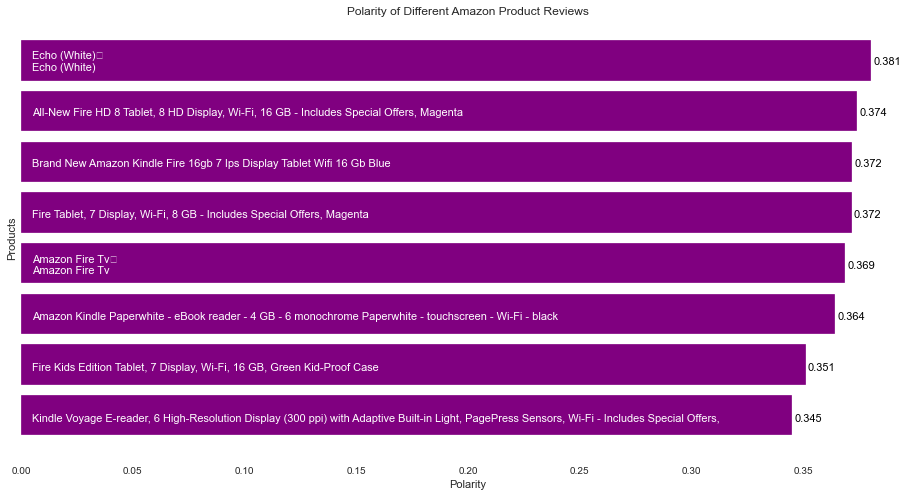

In [ ]:
#Plotting Polarity of different products
product_polarity_sorted=pd.DataFrame(df.groupby('name')['polarity'].mean().sort_values(ascending=True))

plt.figure(figsize=(16,8))
plt.xlabel('Polarity')
plt.ylabel('Products')
plt.title('Polarity of Different Amazon Product Reviews')
polarity_graph=plt.barh(np.arange(len(product_polarity_sorted.index)),product_polarity_sorted['polarity'],color='purple',)

# Writing product names on bar
for bar,product in zip(polarity_graph,product_polarity_sorted.index):
  plt.text(0.005,bar.get_y()+bar.get_width(),'{}'.format(product),va='center',fontsize=11,color='white')

# Writing polarity values on graph
for bar,polarity in zip(polarity_graph,product_polarity_sorted['polarity']):
  plt.text(bar.get_width()+0.001,bar.get_y()+bar.get_width(),'%.3f'%polarity,va='center',fontsize=11,color='black')
  
plt.yticks([])
plt.show()

<Figure size 1152x576 with 0 Axes>

Text(0.5, 0, 'Recommend Percentage')

Text(0, 0.5, 'Products')

Text(0.5, 1.0, 'Percentage of reviewers recommended a product')

Text(0.5, 0.0, 'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case')

Text(0.5, 1.0, 'Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta')

Text(0.5, 2.0, 'Amazon Fire Tv\r\nAmazon Fire Tv')

Text(0.5, 3.0, 'Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue')

Text(0.5, 4.0, 'Echo (White)\r\nEcho (White)')

Text(0.5, 5.0, 'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta')

Text(0.5, 6.0, 'Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers,')

Text(0.5, 7.0, 'Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black')

Text(94.12715902322812, 0.0, '93.63')

Text(95.55564677978471, 1.0, '95.06')

Text(96.42402057776019, 2.0, '95.92')

Text(96.61650485436893, 3.0, '96.12')

Text(96.68181818181819, 4.0, '96.18')

Text(96.8041933191187, 5.0, '96.30')

Text(98.43103448275862, 6.0, '97.93')

Text(98.45340050377834, 7.0, '97.95')

([], [])

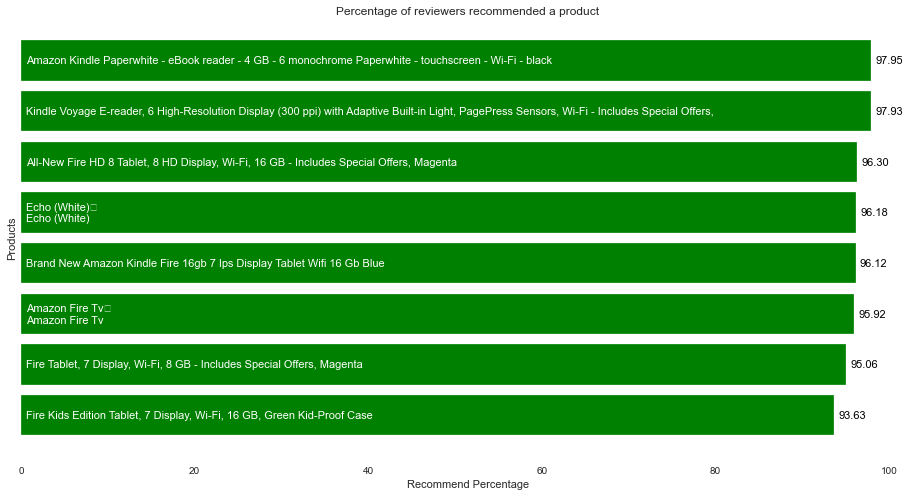

In [ ]:
#Plotting recommendation of different products
recommend_percentage=pd.DataFrame(((df.groupby('name')['reviews.doRecommend'].sum()*100)/df.groupby('name')['reviews.doRecommend'].count()).sort_values(ascending=True))

plt.figure(figsize=(16,8))
plt.xlabel('Recommend Percentage')
plt.ylabel('Products')
plt.title('Percentage of reviewers recommended a product')
recommend_graph=plt.barh(np.arange(len(recommend_percentage.index)),recommend_percentage['reviews.doRecommend'],color='green')

# Writing product names on bar
for bar,product in zip(recommend_graph,recommend_percentage.index):
  plt.text(0.5,bar.get_y()+0.4,'{}'.format(product),va='center',fontsize=11,color='white')

# Writing recommendation percentage on graph
for bar,percentage in zip(recommend_graph,recommend_percentage['reviews.doRecommend']):
  plt.text(bar.get_width()+0.5,bar.get_y()+0.4,'%.2f'%percentage,va='center',fontsize=11,color='black')

plt.yticks([])
plt.show()

In [ ]:
#Checking readability of reviews


SyntaxError: invalid syntax (<ipython-input-113-58641b9bab0c>, line 2)

In [ ]:
pip install textstat

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#Using textstat to determine readability, complexity and grade level of particular review
import textstat
df['dale_chall_score']=df['reviews.text'].apply(lambda x: textstat.dale_chall_readability_score(x))
df['flesh_reading_ease']=df['reviews.text'].apply(lambda x: textstat.flesch_reading_ease(x))
df['gunning_fog']=df['reviews.text'].apply(lambda x: textstat.gunning_fog(x))

print('Dale Chall Score of upvoted reviews=>',df[df['reviews.numHelpful']>1]['dale_chall_score'].mean())
print('Dale Chall Score of not upvoted reviews=>',df[df['reviews.numHelpful']<=1]['dale_chall_score'].mean())

print('Flesch Reading Score of upvoted reviews=>',df[df['reviews.numHelpful']>1]['flesh_reading_ease'].mean())
print('Flesch Reading Score of not upvoted reviews=>',df[df['reviews.numHelpful']<=1]['flesh_reading_ease'].mean())

print('Gunning Fog Index of upvoted reviews=>',df[df['reviews.numHelpful']>1]['gunning_fog'].mean())
print('Gunning Fog Index of not upvoted reviews=>',df[df['reviews.numHelpful']<=1]['gunning_fog'].mean())

Dale Chall Score of upvoted reviews=> 8.211026422764224
Dale Chall Score of not upvoted reviews=> 6.5767804177959786
Flesch Reading Score of upvoted reviews=> 41.13657520325208
Flesch Reading Score of not upvoted reviews=> 67.77130282251612
Gunning Fog Index of upvoted reviews=> 23.7132825203252
Gunning Fog Index of not upvoted reviews=> 13.305156673576837


In [ ]:
#Checking if upvoted and not upvoted reviews are easility understandable by people who completed certain grade school
df['text_standard']=df['reviews.text'].apply(lambda x: textstat.text_standard(x))

print('Text Standard of upvoted reviews=>',df[df['reviews.numHelpful']>1]['text_standard'].mode())
print('Text Standard of not upvoted reviews=>',df[df['reviews.numHelpful']<=1]['text_standard'].mode())


Text Standard of upvoted reviews=> 0    -1th and 0th grade
dtype: object
Text Standard of not upvoted reviews=> 0    5th and 6th grade
dtype: object


In [ ]:
#Checking reading time for a review (Average adults reads 250 words per minute)

df['reading_time']=df['reviews.text'].apply(lambda x: textstat.reading_time(x))

print('Reading Time of upvoted reviews=>',df[df['reviews.numHelpful']>1]['reading_time'].mean())
print('Reading Time of not upvoted reviews=>',df[df['reviews.numHelpful']<=1]['reading_time'].mean())

#People find longer reviews helpful

Reading Time of upvoted reviews=> 3.3263414634146367
Reading Time of not upvoted reviews=> 1.729622069845325


In [ ]:
#conclusion from EDA on Amazon Product Revies

#Customers love products from Amazon. They find them a great purchase and easy to use
#Amazon needs to work on the Fire Kids Edition Tablet because it has the most negative reviews. It is also the least recommended product
#The majority of reviews are written in simple English and are easily understandable by anyone who has 5th or 6th grade of school
#The reading time of helpful reviews is twice that of non-helpful reviews which means people find longer reviews helpful
 